# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "BreastCancer"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
PassiveLearningRF = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", "PLA0")
RandomForestResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", "RFA0")
AnalyzedDataUNREALDUREAL = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.02)

# Shape

In [3]:
ShapeTable = {"PassiveLearningRF": PassiveLearningRF["Error"].shape[0],
              "RandomForestResults": RandomForestResults["Error"].shape[0],
              "DUREAL":[AnalyzedDataUNREALDUREAL["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedDataUNREALDUREAL["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable

,PassiveLearningRF,RandomForestResults,DUREAL,UNREAL
0,11,11,11,11


# Run Time

In [4]:
TimeTable = {"DUREAL Mean":[str(round(np.mean(AnalyzedDataUNREALDUREAL["Time_DUREAL"])/60,2))],
              "UNREAL Mean": [str(round(np.mean(AnalyzedDataUNREALDUREAL["Time_UNREAL"])/60,2))],
                "DUREAL max":[str(round(np.max(AnalyzedDataUNREALDUREAL["Time_DUREAL"])/60,2))],
              "UNREAL max": [str(round(np.max(AnalyzedDataUNREALDUREAL["Time_UNREAL"])/60,2))]
                         }
TimeTable = pd.DataFrame(TimeTable)
# TimeTable.index = range(10,30,5)
TimeTable

,DUREAL Mean,UNREAL Mean,DUREAL max,UNREAL max
0,23.15,21.38,77.14,79.7


# Error Vec

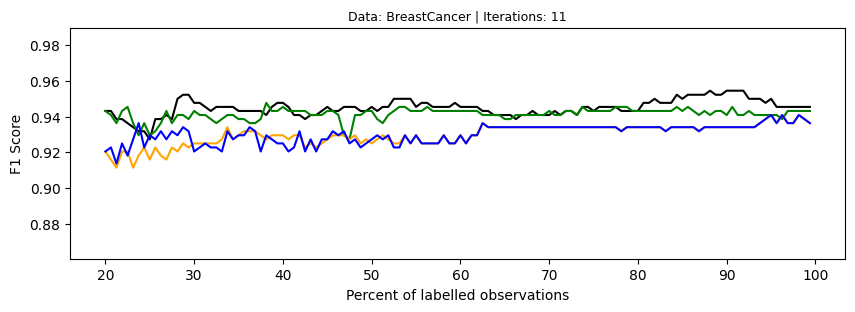

In [5]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedDataUNREALDUREAL['Error_DUREAL'].shape[0]}"
colors = {
    "PassiveLearning": "black",
    "RandomForest": "green",
    "DUREAL": "orange",
    "UNREAL": "blue"
}

linestyles = {
    "PassiveLearning": "solid",
    "RandomForest": "solid",
    "DUREAL": "solid",
    "UNREAL": "solid"
}

LegendMapping = {
    "DUREAL0": "DUREAL (ε = 0.xxx)",
    "UNREAL0": "UNREAL (ε = 0.xxx)",
}

# markerstyles = {
#     "PassiveLearning": "^",
#     "RandomForest": "^",
#     "DUREAL": "^",
#     "UNREAL": "^"
# }

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 PassiveLearning = PassiveLearningRF["Error"],
                 RandomForest = RandomForestResults["Error"],
                 DUREAL = AnalyzedDataUNREALDUREAL["Error_DUREAL"],
                 UNREAL = AnalyzedDataUNREALDUREAL["Error_UNREAL"],
                 Colors = colors,
                LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                #  Markerstyles = markerstyles,
                # xlim = [20,25],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                #  FigSize = (10,10),
                 CriticalValue = 1.96)

# Wilcoxon Ranked Signed Test

In [6]:
# WRSTResults = WilcoxonRankSignedTest({
#     "PassiveLearning" :PassiveLearningRF["Error"],
#     "RandomForest" : RandomForestResults["Error"],
#     "UNREAL" : AnalyzedDataUNREALDUREAL["Error_UNREAL"],
#     "DUREAL" : AnalyzedDataUNREALDUREAL["Error_DUREAL"]},
#     5)

# WRSTResults_LatexTable = WRSTResults.to_latex()
# print(WRSTResults_LatexTable)

# Input

# Selection History

In [7]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForestResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREAL = SelectionHistoryRankFunction(AnalyzedDataUNREALDUREAL["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREAL = SelectionHistoryRankFunction(AnalyzedDataUNREALDUREAL["SelectionHistory_DUREAL"], DataType = DataType)
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
SelectionHistoryRank_UNREAL.sort_values(by = "AverageRank").head()
SelectionHistoryRank_DUREAL.sort_values(by = "AverageRank").head()

,AverageRank,ClumpThickness_10,CellSize_1,CellSize_10,CellShape_1,Adhesion_1,SingleEpithelialCellSize_2,BareNuclei_1,BareNuclei_10,NormalNucleoli_1,NormalNucleoli_10,Y
326,4.111111,1,1,0,1,1,1,0,1,0,0,1
6,6.000000,0,1,0,1,1,1,0,1,1,0,0
556,7.285714,0,0,0,0,0,0,1,0,1,0,0
348,8.000000,0,0,0,0,0,0,1,0,0,0,1
668,8.555556,0,0,0,0,1,0,1,0,0,1,1


# Tree Counts

In [8]:
# UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
# DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
# AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
#                               DUREAL_Average_TreeCountsRatioSmall,
#                               np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
#                              columns = ["UNREAL", "DUREAL", "Difference"])

# UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
# DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
# AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
#                               DUREAL_Average_TreeCountsRatioLarge,
#                               np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
#                              columns = ["UNREAL", "DUREAL", "Difference"])

# Number of All Trees

In [9]:
# ### Line Styles ###
# linestyles = {"DUREAL005" : "solid",
# "DUREAL010" : "solid",
# "DUREAL015" : "solid",
# "DUREAL020" : "solid",
# "DUREAL025" : "solid"
# }

# ### Figure ##
# MeanPlot = MeanVariancePlot(RelativeError = None,
#                  DUREAL010 = np.log(AnalyzedData010["TreeCounts_ALL_UNREAL"]),
#                  DUREAL015 = np.log(AnalyzedData015["TreeCounts_ALL_UNREAL"]),
#                  DUREAL020 = np.log(AnalyzedData020["TreeCounts_ALL_UNREAL"]),
#                  DUREAL025 = np.log(AnalyzedData025["TreeCounts_ALL_UNREAL"]),
#                 # Colors = colors,
#                  LegendMapping=LegendMapping,
#                  Linestyles=linestyles,
#                 # xlim = [20,50],
#                 Y_Label = "log(Number of All Trees)",
#                  Subtitle = PlotSubtitle,
#                  TransparencyVal = 0.2,
#                  VarInput = False,
#                  CriticalValue = 1.96)

## Number of Unique Trees

In [10]:
# ### Linetype ###
# linestyles = {"UNREAL010" : "solid",
# "UNREAL015" : "solid",
# "UNREAL020" : "solid",
# "UNREAL025" : "solid"
# }

# ### Figure ##
# MeanPlot = MeanVariancePlot(RelativeError = None,
#                  UNREAL010 = np.log(AnalyzedData010["TreeCounts_UNIQUE_UNREAL"]),
#                  UNREAL015 = np.log(AnalyzedData015["TreeCounts_UNIQUE_UNREAL"]),
#                  UNREAL020 = np.log(AnalyzedData020["TreeCounts_UNIQUE_UNREAL"]),
#                  UNREAL025 = np.log(AnalyzedData025["TreeCounts_UNIQUE_UNREAL"]),
#                 # Colors = colors,
#                  LegendMapping=LegendMapping,
#                  Linestyles=linestyles,
#                 # xlim = [20,50],
#                 Y_Label = "log(Number of Unique Trees)",
#                  Subtitle = PlotSubtitle,
#                  TransparencyVal = 0.05,
#                  VarInput = False,
#                  CriticalValue = 1.96)